In [1]:
#Wikipedia contains a wealth of data concerning hurricanes. Using python and pandas we can scrape this
# data and merge it with other data to create a nice data set on Atlantic Hurricanes from 1900 to presnt day. 


#Here import the packages needed including pandas. Beautiful soup is not especially nexccecarry here but is an iteresting way 
#to grab other page information. I use it here to grab the table headers. 
from bs4 import BeautifulSoup
import requests
import pandas as pd

html = requests.get("https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes").text #grabing the html from wikipedia
soup = BeautifulSoup(html, 'html5lib') #creating a soup object that allows for searching via tags

all_tables_in_dataframes = pd.read_html(html)
select_table = all_tables_in_dataframes[5]

table = soup.find_all('table', class_="wikitable")[5] 

#Here I strip the header row information using a list comprehension
headers = [header.text.strip() for header in table.find_all('th',{'scope' :'col'})] 

data = select_table
data.columns = headers
data2 = data.drop(data.index[0])
data2 = data.drop(data.index[27])
data2.head()

,Stormname,Track,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure,Notes
0,Stormname,Track,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure,Notes
1,Hurricane Iris,NaN,2001,October 8–9,145 mph (230 km/h),948 mbar (hPa; 27.99 inHg),NaN
2,Hurricane Michelle,NaN,2001,November 3–4,140 mph (220 km/h),933 mbar (hPa; 27.55 inHg),NaN
3,Hurricane Lili,NaN,2002,October 2–3,145 mph (230 km/h),938 mbar (hPa; 27.70 inHg),NaN
4,Hurricane Fabian,NaN,2003,August 31–September 5,145 mph (230 km/h),939 mbar (hPa; 27.73 inHg),NaN


In [4]:
#Cleaning up the dataframe


In [5]:
#Removing unwanted columns
data3 = data2.drop(columns='Track')
Hurricanes = data3.drop(columns='Notes')

In [6]:
Hurricanes.head()

,Stormname,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure
0,Stormname,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure
1,Hurricane Iris,2001,October 8–9,145 mph (230 km/h),948 mbar (hPa; 27.99 inHg)
2,Hurricane Michelle,2001,November 3–4,140 mph (220 km/h),933 mbar (hPa; 27.55 inHg)
3,Hurricane Lili,2002,October 2–3,145 mph (230 km/h),938 mbar (hPa; 27.70 inHg)
4,Hurricane Fabian,2003,August 31–September 5,145 mph (230 km/h),939 mbar (hPa; 27.73 inHg)


In [7]:
#Trimming the data in the wind coloum to only get the values for wind in mph. 
#Here I use a regular expression  to extract the first 3 digits 
#first a test
winds = Hurricanes['Maximumsustained winds'].str.extract(r'^(\d{3})', expand=False)

In [8]:
Hurricanes['Maximumsustained winds'] = Hurricanes['Maximumsustained winds'].str.extract(r'^(\d{3})', expand=False)

In [9]:
Hurricanes.head()

,Stormname,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure
0,Stormname,Season,Dates as aCategory 4,NaN,Minimum pressure
1,Hurricane Iris,2001,October 8–9,145,948 mbar (hPa; 27.99 inHg)
2,Hurricane Michelle,2001,November 3–4,140,933 mbar (hPa; 27.55 inHg)
3,Hurricane Lili,2002,October 2–3,145,938 mbar (hPa; 27.70 inHg)
4,Hurricane Fabian,2003,August 31–September 5,145,939 mbar (hPa; 27.73 inHg)


In [10]:
#Trimming the data in the pressure coloum to only get the values for wind in mph
#first a test
pressure = Hurricanes['Minimum pressure'].str.extract(r'^(\d{3})', expand=False)

In [11]:
Hurricanes['Minimum pressure'] = Hurricanes['Minimum pressure'].str.extract(r'^(\d{3})', expand=False)
Hurricanes.head()

,Stormname,Season,Dates as aCategory 4,Maximumsustained winds,Minimum pressure
0,Stormname,Season,Dates as aCategory 4,NaN,NaN
1,Hurricane Iris,2001,October 8–9,145,948
2,Hurricane Michelle,2001,November 3–4,140,933
3,Hurricane Lili,2002,October 2–3,145,938
4,Hurricane Fabian,2003,August 31–September 5,145,939


In [12]:
# Here we want to chnage the data types into something that we can use for analysis
Hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 5 columns):
Stormname                 27 non-null object
Season                    27 non-null object
Dates as aCategory 4      27 non-null object
Maximumsustained winds    26 non-null object
Minimum pressure          26 non-null object
dtypes: object(5)
memory usage: 1.3+ KB


In [13]:
#Renaming the columns without spaces so they can be called using the pandas dot functions
Hurricanes.columns = ['StormName','Year', 'Date',\
                  'WindSpeed', 'Pressure']

In [14]:
#Chaning the storm name and year catagories for analysis
Hurricanes.StormName = Hurricanes.StormName.astype('category')
Hurricanes.Year = pd.to_numeric(Hurricanes.Year, errors='coerce').fillna(0).astype('int64')
#Changing the wind speed and pressure to numeric values using pd.to numeric before changing to integers
Hurricanes.WindSpeed = pd.to_numeric(Hurricanes.WindSpeed, errors='coerce').fillna(0).astype('int64') 
Hurricanes.Pressure = pd.to_numeric(Hurricanes.Pressure, errors='coerce').fillna(0).astype('int64')

In [15]:
Hurricanes.head()

,StormName,Year,Date,WindSpeed,Pressure
0,Stormname,0,Dates as aCategory 4,0,0
1,Hurricane Iris,2001,October 8–9,145,948
2,Hurricane Michelle,2001,November 3–4,140,933
3,Hurricane Lili,2002,October 2–3,145,938
4,Hurricane Fabian,2003,August 31–September 5,145,939


In [16]:
#Here we grab a new table from a different wikipeadia page containing a list of catagory 5 hurricanes 
html2 = requests.get("https://en.wikipedia.org/wiki/List_of_Category_5_Atlantic_hurricanes").text #grabing the html from wikipedia
soup2 = BeautifulSoup(html, 'html5lib') #creating a soup object that allows for searching via tags


df = pd.read_html(html2, flavor='bs4') # If we change the flavour to bs4 it allows us to parce the values better for damage

select_table2 = df[1]

select_table2.head()

Cat5s = select_table2 # assinging the new dataframe to called Cat5s so we know this is the data for catagory 5 hurricans 




In [17]:
#Cleaning up the new dataframe
Cat5s.head()


,0,1,2,3,4,5,6,7,8
0,Name,Dates as aCategory 5,Duration(hours),Sustainedwind speeds,Pressure,Areas affected,Deaths,Damage(USD),Refs
1,"""Cuba""","October 19, 1924",12,165 mph (270 km/h),910 hPa (26.87 inHg),"Central America, Mexico, CubaFlorida, The Bahamas",90,NaN,[10]
2,"""San Felipe IIOkeechobee""","September 13–14, 1928",12,160 mph (260 km/h),929 hPa (27.43 inHg),"Lesser Antilles, The BahamasUnited States East...",4000,$100 million,NaN
3,"""Bahamas""","September 5–6, 1932",24,160 mph (260 km/h),921 hPa (27.20 inHg),"The Bahamas, Northeastern United States",16,NaN,NaN
4,"""Cuba""","November 5–8, 1932",78,175 mph (280 km/h),915 hPa (27.02 inHg),"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 million,NaN


In [18]:
#Assinging new column headers 
Cat5s.columns = ['StormName','Year', 'Duration',\
                  'WindSpeed', 'Pressure', 'Area', 'Deaths','Damage','Refs']
#Remvoing the fist and last rows as they contain dublicate or unceccecary info
Cat5s = Cat5s.drop(Cat5s.index[0])
Cat5s = Cat5s.drop(Cat5s.index[len(Cat5s)-1]) # Here we drop the last row by using the len function minus one inside the index

In [19]:
#Remove uneccecary columns. 
Cat5s = Cat5s.drop(columns='Refs')


In [20]:
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""","October 19, 1924",12,165 mph (270 km/h),910 hPa (26.87 inHg),"Central America, Mexico, CubaFlorida, The Bahamas",90,NaN
2,"""San Felipe IIOkeechobee""","September 13–14, 1928",12,160 mph (260 km/h),929 hPa (27.43 inHg),"Lesser Antilles, The BahamasUnited States East...",4000,$100 million
3,"""Bahamas""","September 5–6, 1932",24,160 mph (260 km/h),921 hPa (27.20 inHg),"The Bahamas, Northeastern United States",16,NaN
4,"""Cuba""","November 5–8, 1932",78,175 mph (280 km/h),915 hPa (27.02 inHg),"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 million
5,"""Cuba–Brownsville""","August 30, 1933",12,160 mph (260 km/h),930 hPa (27.46 inHg),"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27.9 million


In [21]:
#We can apply the same reular expression trimming techniques to the values as before
#first a test
pressure = Cat5s['Pressure'].str.extract(r'^(\d{3})', expand=False)
#then assign it to the dataframe
Cat5s['Pressure'] = Cat5s['Pressure'].str.extract(r'^(\d{3})', expand=False)

#We use the same techniques for windspeed
Cat5s['WindSpeed'] = Cat5s['WindSpeed'].str.extract(r'^(\d{3})', expand=False)

In [22]:
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""","October 19, 1924",12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,NaN
2,"""San Felipe IIOkeechobee""","September 13–14, 1928",12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,$100 million
3,"""Bahamas""","September 5–6, 1932",24,160,921,"The Bahamas, Northeastern United States",16,NaN
4,"""Cuba""","November 5–8, 1932",78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 million
5,"""Cuba–Brownsville""","August 30, 1933",12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27.9 million


In [23]:
#We need to revesre this process for the year coloumn. In this case we want the last 4 digits 
# first a test
Cat5s.Year = Cat5s.Year.str.replace('†','') # removing the strange characters
Cat5s.Year = Cat5s.Year.str.rstrip() #Striping the white space from the right hand side
Cat5s.Year = Cat5s.Year.str[-4:] # selecting the last 4 chracters. These 3 lines should be combied into 1!!!!!
#†

In [24]:
Cat5s.head(15) #We need to clean up the Damage coloum but it is tricky as the data is very messy. Some 
#values are in millions, others are in billions, some have decimal points and others do not. 

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,NaN
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,$100 million
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,NaN
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 million
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27.9 million
6,"""Tampico""",1933,12,160,929,"Jamaica, Yucatán Peninsula",184,$5 million
7,"""Labor Day""",1935,18,185,892,"The Bahamas, Florida, Georgia, The Carolinas, ...",408,NaN
8,"""New England""",1938,18,160,940,"Southeastern United States, Northeastern Unite...",682,$306 million
9,Carol,1953,12,160,929,"Bermuda, New England, Atlantic Canada",5,$2 million
10,Janet,1955,18,175,914,"Lesser Antilles, Central America",1023,$65.8 million


In [25]:
import numpy as np
Cat5s.Damage = Cat5s.Damage.fillna(0) #here we fill the NaN values with zeros

#Here we subset the dataframe using str contains and regualr expressions. we need to put r'\ before search for the decemil point
Set1 = Cat5s[(Cat5s.Damage.str.contains('million', na=False)) & (Cat5s.Damage.str.contains(r'\.', na=False))] # 

Set1 = Set1.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
Set1 = Set1.str.replace('million','000000') # Here we replace the text of millions with digits. 

Cat5s.update(Set1)
Cat5s.head(10) # We can see the millions with decimal points make more sense here 

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,0
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,$100 million
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,0
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 million
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27 000000
6,"""Tampico""",1933,12,160,929,"Jamaica, Yucatán Peninsula",184,$5 million
7,"""Labor Day""",1935,18,185,892,"The Bahamas, Florida, Georgia, The Carolinas, ...",408,0
8,"""New England""",1938,18,160,940,"Southeastern United States, Northeastern Unite...",682,$306 million
9,Carol,1953,12,160,929,"Bermuda, New England, Atlantic Canada",5,$2 million
10,Janet,1955,18,175,914,"Lesser Antilles, Central America",1023,$65 000000


In [26]:
#Fixing the other millions without decimal points 
Set2 = Cat5s[(Cat5s.Damage.str.contains('million', na=False))] 
Set2 = Set2.Damage.str.replace('million','000000')

Cat5s.update(Set2)
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,0
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,$100 000000
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,0
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 000000
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27 000000


In [27]:
#We can repeat the process above for the figures for billions
Set3 = Cat5s[(Cat5s.Damage.str.contains('billion', na=False)) & (Cat5s.Damage.str.contains(r'\.', na=False))] # 

Set3 = Set3.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
Set3 = Set3.str.replace('billon','000000000') # Here we replace the text of billons with digits. 

Cat5s.update(Set3)

Set4 = Cat5s[(Cat5s.Damage.str.contains('billion', na=False))] 
Set4 = Set4.Damage.str.replace('billion','000000000')

Cat5s.update(Set4)
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,0
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,$100 000000
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,0
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,$40 000000
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,$27 000000
6,"""Tampico""",1933,12,160,929,"Jamaica, Yucatán Peninsula",184,$5 000000
7,"""Labor Day""",1935,18,185,892,"The Bahamas, Florida, Georgia, The Carolinas, ...",408,0
8,"""New England""",1938,18,160,940,"Southeastern United States, Northeastern Unite...",682,$306 000000
9,Carol,1953,12,160,929,"Bermuda, New England, Atlantic Canada",5,$2 000000
10,Janet,1955,18,175,914,"Lesser Antilles, Central America",1023,$65 000000


In [28]:
Cat5s.Damage.unique()


array([0, '$100\xa0000000', '$40\xa0000000', '$27\xa0000000',
       '$5\xa0000000', '$306\xa0000000', '$2\xa0000000', '$65\xa0000000',
       '$326\xa0000000', '$60\xa0000000', '$208\xa0000000',
       '$12\xa0000000000', '$25\xa0000000', 'Extensive',
       '$14\xa0000000000', '$7\xa0000000000', '$10\xa0000000000',
       '$26\xa0000000000', '$6\xa0000000000', '$57\xa0000000000',
       '$23\xa0000000000', '$11\xa0000000000', '$125\xa0000000000',
       '$29\xa0000000000', '$16\xa0000000000', '$720\xa0000000',
       '$15\xa0000000000', '>$64\xa0000000000', '>$91\xa0000000000'],
      dtype=object)

In [29]:
Set5 = Cat5s[Cat5s.Damage.str.contains('Extensive', na=False)]
Set5 = Set5.Damage.str.replace('Extensive','0')
Cat5s.update(Set5)


#Remvoing dollar signs and white space 
Cat5s.Damage = Cat5s.Damage.str.replace(r'\$','')
Cat5s.Damage = Cat5s.Damage.str.replace(r'\s','')
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,NaN
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,100000000
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,NaN
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,40000000
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,27000000
6,"""Tampico""",1933,12,160,929,"Jamaica, Yucatán Peninsula",184,5000000
7,"""Labor Day""",1935,18,185,892,"The Bahamas, Florida, Georgia, The Carolinas, ...",408,NaN
8,"""New England""",1938,18,160,940,"Southeastern United States, Northeastern Unite...",682,306000000
9,Carol,1953,12,160,929,"Bermuda, New England, Atlantic Canada",5,2000000
10,Janet,1955,18,175,914,"Lesser Antilles, Central America",1023,65000000


In [30]:
#Chaning the storm name and year catagories for analysis
Cat5s.StormName = Cat5s.StormName.astype('category')
#Changing the wind speed and pressure to numeric values using pd.to numeric before changing to integers
Cat5s.Damage = pd.to_numeric(Cat5s.Damage, errors='coerce').fillna(0).astype('int64') 
Cat5s.WindSpeed = pd.to_numeric(Cat5s.WindSpeed, errors='coerce').fillna(0).astype('int64') 
Cat5s.Pressure = pd.to_numeric(Cat5s.Pressure, errors='coerce').fillna(0).astype('int64') 
Cat5s.head()

,StormName,Year,Duration,WindSpeed,Pressure,Area,Deaths,Damage
1,"""Cuba""",1924,12,165,910,"Central America, Mexico, CubaFlorida, The Bahamas",90,0
2,"""San Felipe IIOkeechobee""",1928,12,160,929,"Lesser Antilles, The BahamasUnited States East...",4000,100000000
3,"""Bahamas""",1932,24,160,921,"The Bahamas, Northeastern United States",16,0
4,"""Cuba""",1932,78,175,915,"Lesser Antilles, Jamaica, Cayman IslandsCuba, ...",3103,40000000
5,"""Cuba–Brownsville""",1933,12,160,930,"The Bahamas, Cuba, FloridaTexas, Tamaulipas",179,27000000


In [31]:
#Adding extra data from a CSV file for the catagory 4 hurricanes 

In [32]:
Cat4Damage = pd.read_csv('Catagory4HurricaneCosts.csv')

In [33]:
Cat4Damage.head()

,StormName,Damage
0,Hurricane Iris,$250 million
1,Hurricane Michelle,$2.43 billion
2,Hurricane Lili,$1.16 billion
3,Hurricane Fabian,$300 million
4,Hurricane Charley,$16.9 billion
5,Hurricane Frances,$10.1 billion
6,Hurricane Karl,0
7,Hurricane Dennis,$3.98 billion
8,Hurricane Gustav,$8.31 billion
9,Hurricane Ike,$38 billion


In [34]:
# We need to clean up the daage column as we did before by simply copying the code and chaning a few things

#Here we subset the dataframe using str contains and regualr expressions. we need to put r'\ before search for the decemil point
Set1 = Cat4Damage[(Cat4Damage.Damage.str.contains('million', na=False)) & (Cat4Damage.Damage.str.contains(r'\.', na=False))] # 

Set1 = Set1.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
Set1 = Set1.str.replace('million','000000') # Here we replace the text of millions with digits. 

Cat4Damage.update(Set1)
Cat4Damage.head(15) # We can see the millions with decimal points make more sense here 

#Fixing the other millions without decimal points 
Set2 = Cat4Damage[(Cat4Damage.Damage.str.contains('million', na=False))] 
Set2 = Set2.Damage.str.replace('million','000000')

Cat4Damage.update(Set2)
Cat4Damage.head()

#We can repeat the process above for the figures for billions
Set3 = Cat4Damage[(Cat4Damage.Damage.str.contains('billion', na=False)) & (Cat4Damage.Damage.str.contains(r'\.', na=False))] # 

Set3 = Set3.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
Set3 = Set3.str.replace('billon','000000000') # Here we replace the text of billons with digits. 

Cat4Damage.update(Set3)

Set4 = Cat4Damage[(Cat4Damage.Damage.str.contains('billion', na=False))] 
Set4 = Set4.Damage.str.replace('billion','000000000')

Cat4Damage.update(Set4)

#Remvoing dollar signs and white space 
Cat4Damage.Damage = Cat4Damage.Damage.str.replace(r'\$','')
Cat4Damage.Damage = Cat4Damage.Damage.str.replace(r'\s','')

Cat4Damage.Damage = pd.to_numeric(Cat4Damage.Damage, errors='coerce').fillna(0).astype('int64')

Cat4Damage.head()

,StormName,Damage
0,Hurricane Iris,250000000
1,Hurricane Michelle,23000000000
2,Hurricane Lili,16000000000
3,Hurricane Fabian,300000000
4,Hurricane Charley,16000000000
5,Hurricane Frances,10000000000
6,Hurricane Karl,0
7,Hurricane Dennis,38000000000
8,Hurricane Gustav,81000000000
9,Hurricane Ike,38000000000


In [35]:
#We need to add the new data to the first dataframe Hurricanes

In [36]:
#Adding a new coloum damage to the first data frame
Hurricanes = pd.merge(Hurricanes, Cat4Damage, on='StormName')
Hurricanes.head()

,StormName,Year,Date,WindSpeed,Pressure,Damage
0,Hurricane Iris,2001,October 8–9,145,948,250000000
1,Hurricane Michelle,2001,November 3–4,140,933,23000000000
2,Hurricane Lili,2002,October 2–3,145,938,16000000000
3,Hurricane Fabian,2003,August 31–September 5,145,939,300000000
4,Hurricane Charley,2004,August 13,150,941,16000000000


In [37]:
Hurricanes.Damage = pd.to_numeric(Hurricanes.Damage, errors='coerce').fillna(0).astype('int64')
Cat5s.Year = pd.to_numeric(Cat5s.Year, errors='coerce').fillna(0).astype('int64')

In [38]:
#Adding the hurricane Catagorys to the each dataframe
Hurricanes['Category'] = 'Category 4'
Cat5s['Category'] = 'Category 5'
Hurricanes.Category = Hurricanes.Category.astype('category')
Cat5s.Category = Cat5s.Category.astype('category')

In [39]:
Hurricanes.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 7 columns):
StormName    26 non-null object
Year         26 non-null int64
Date         26 non-null object
WindSpeed    26 non-null int64
Pressure     26 non-null int64
Damage       26 non-null int64
Category     26 non-null category
dtypes: category(1), int64(4), object(2)
memory usage: 1.5+ KB


In [40]:
Cat5s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 9 columns):
StormName    33 non-null category
Year         33 non-null int64
Duration     33 non-null object
WindSpeed    33 non-null int64
Pressure     33 non-null int64
Area         33 non-null object
Deaths       33 non-null object
Damage       33 non-null int64
Category     33 non-null category
dtypes: category(2), int64(4), object(3)
memory usage: 3.7+ KB


In [41]:
Merged = pd.concat([Cat5s, Hurricanes], ignore_index=False, axis=0, sort=True, join='inner')

In [42]:
Merged.head()

,Category,Damage,Pressure,StormName,WindSpeed,Year
1,Category 5,0,910,"""Cuba""",165,1924
2,Category 5,100000000,929,"""San Felipe IIOkeechobee""",160,1928
3,Category 5,0,921,"""Bahamas""",160,1932
4,Category 5,40000000,915,"""Cuba""",175,1932
5,Category 5,27000000,930,"""Cuba–Brownsville""",160,1933
6,Category 5,5000000,929,"""Tampico""",160,1933
7,Category 5,0,892,"""Labor Day""",185,1935
8,Category 5,306000000,940,"""New England""",160,1938
9,Category 5,2000000,929,Carol,160,1953
10,Category 5,65000000,914,Janet,175,1955


<function matplotlib.pyplot.show(*args, **kw)>

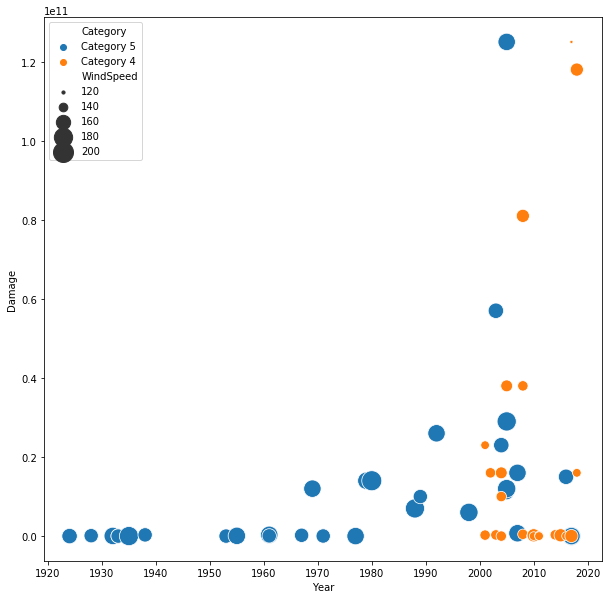

In [43]:
# Here we can plot the data to see how our dataset is shaping up so far. We do this using the Seaborn libaray

#Importing new packages
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Creating the figure using seborn library
ax = f, axes = plt.subplots(0,1, figsize=(10,10))
fig1 = sns.scatterplot(x="Year", y="Damage",
                     hue="Category", size="WindSpeed",
                     sizes=(10, 400),
                     data=Merged)
plt.xticks(np.arange(1920,2030,10))
plt.show


In [44]:
# It seems from the figure about that we need much more data on catagory 4 hurricanes in the first half of the 20th
# century 

#importing more data for catagory 4 hurricanes
html = requests.get("https://en.wikipedia.org/wiki/List_of_Category_4_Atlantic_hurricanes").text #grabing the html from wikipedia

all_tables_in_dataframes = pd.read_html(html)
select_table3 = all_tables_in_dataframes[3]
select_table4 = all_tables_in_dataframes[4]
select_table5 = all_tables_in_dataframes[2]

data = select_table3 # this is a list of hurricanes from 1951-1975
data2 = select_table4 # this is a list from 1976–2000
data3 = select_table5 # this is a list fromn 1901–1950

#Here we need to rename the coloumn headers, remove rows and drop the first two coloms as they are the wrong unit value
data.columns = ['StormName','Year', 'Month',\
                  'To_drop1', 'To_drop2','WindSpeed','Pressure']
data = data.drop(columns='To_drop1')
data = data.drop(columns='To_drop2')
data = data.drop(data.index[0:2])
data = data.drop(data.index[-1])

data2.columns = ['StormName','Year', 'Month',\
                  'To_drop1', 'To_drop2','WindSpeed','Pressure']
data2 = data2.drop(columns='To_drop1')
data2 = data2.drop(columns='To_drop2')
data2 = data2.drop(data2.index[0:2])
data2 = data2.drop(data2.index[-1])

data3.columns = ['StormName','Year', 'Month',\
                  'To_drop1', 'To_drop2','WindSpeed','Pressure']
data3 = data3.drop(columns='To_drop1')
data3 = data3.drop(columns='To_drop2')
data3 = data3.drop(data3.index[0:2])
data3 = data3.drop(data3.index[-1])

#Here we need to merge the 3 dataframes into 1 
merged2 = pd.concat([data3, data, data2], ignore_index=False, axis=0, sort=True, join='inner')




In [45]:
import chardet #Using the universal encoding detector package to figure out the encoding of the csv file. 

with open('cat4costs2.csv', 'rb') as f:
    result = chardet.detect(f.read())

Cat4Damage2 = pd.read_csv('cat4costs2.csv', encoding=result['encoding'])

In [46]:
Cat4Damage2.head(5)

,StormName,Damage
0,Hurricane #4,0
1,1910 Cuba hurricane,1.25 million
2,1915 Galveston hurricane,50 million
3,1915 New Orleans hurricane,13 million
4,1916 Texas hurricane,28.6 million


In [47]:
#clean up the damage colomn
subset = Cat4Damage2[(Cat4Damage2.Damage.str.contains('million', na=False)) & (Cat4Damage2.Damage.str.contains(r'\.', na=False))] # 

subset = subset.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
subset = subset.str.replace('million','000000') # Here we replace the text of millions with digits. 

Cat4Damage2.update(subset)
Cat4Damage2.head(15) # We can see the millions with decimal points make more sense here 

#Fixing the other millions without decimal points 
subset2 = Cat4Damage2[(Cat4Damage2.Damage.str.contains('million', na=False))] 
subset2 = subset2.Damage.str.replace('million','000000')

Cat4Damage2.update(subset2)
Cat4Damage2.head()

#We can repeat the process above for the figures for billions
subset3 = Cat4Damage2[(Cat4Damage2.Damage.str.contains('billion', na=False)) & (Cat4Damage2.Damage.str.contains(r'\.', na=False))] # 

subset3 = subset3.Damage.str.replace(r'\.\d','') #Removing the decimal point and the following digit from the string
subset3 = subset3.str.replace('billon','000000000') # Here we replace the text of billons with digits. 

Cat4Damage2.update(subset3)

subset4 = Cat4Damage2[(Cat4Damage2.Damage.str.contains('billion', na=False))] 
subset4 = subset4.Damage.str.replace('billion','000000000')

Cat4Damage2.update(subset4)

#Remvoing dollar signs and white space 
Cat4Damage2.Damage = Cat4Damage2.Damage.str.replace(r'\$','')
Cat4Damage2.Damage = Cat4Damage2.Damage.str.replace(r'\s','')

Cat4Damage2.Damage = pd.to_numeric(Cat4Damage2.Damage, errors='coerce').fillna(0).astype('int64')

Cat4Damage2.head(5)

,StormName,Damage
0,Hurricane #4,0
1,1910 Cuba hurricane,15000000
2,1915 Galveston hurricane,50000000
3,1915 New Orleans hurricane,13000000
4,1916 Texas hurricane,28000000


In [48]:
merged2.head()

,Month,Pressure,StormName,WindSpeed,Year
2,"August, September",950,Hurricane #4,130.0,1906
3,October,924,1910 Cuba hurricane,150.0,1910
4,August,940,1915 Galveston hurricane,145.0,1915
5,"September, October",931,1915 New Orleans hurricane,145.0,1915
6,August,932,1916 Texas hurricane,130.0,1916


In [49]:
merged2.StormName = merged2.StormName.astype('str')
Cat4Damage2.StormName = Cat4Damage2.StormName.astype('str')

In [50]:
merged2 = merged2.reset_index(drop=True)

In [51]:
merged2.head()

,Month,Pressure,StormName,WindSpeed,Year
0,"August, September",950,Hurricane #4,130.0,1906
1,October,924,1910 Cuba hurricane,150.0,1910
2,August,940,1915 Galveston hurricane,145.0,1915
3,"September, October",931,1915 New Orleans hurricane,145.0,1915
4,August,932,1916 Texas hurricane,130.0,1916


In [52]:
merged3 = merged2.merge(Cat4Damage2, on='StormName', how='left') #mergering the dataframes

In [53]:
merged3.head(5) 

,Month,Pressure,StormName,WindSpeed,Year,Damage
0,"August, September",950,Hurricane #4,130.0,1906,0.0
1,"August, September",950,Hurricane #4,130.0,1906,0.0
2,"August, September",950,Hurricane #4,130.0,1906,0.0
3,October,924,1910 Cuba hurricane,150.0,1910,15000000.0
4,August,940,1915 Galveston hurricane,145.0,1915,50000000.0


In [54]:
#The dataframe is murged but with some duplucate values. We wil subset the duplicate values and remove them. 

In [55]:
#Here we strip away all rows which have the a StormName of Hurricane 4 
stripped = merged3.drop(merged3[(merged3.StormName.str.contains(r'\#''[4]'))].index) 

In [56]:
# now we need to merge this last dataframe with the main one
stripped.head()

,Month,Pressure,StormName,WindSpeed,Year,Damage
3,October,924,1910 Cuba hurricane,150.0,1910,15000000.0
4,August,940,1915 Galveston hurricane,145.0,1915,50000000.0
5,"September, October",931,1915 New Orleans hurricane,145.0,1915,13000000.0
6,August,932,1916 Texas hurricane,130.0,1916,28000000.0
7,September,928,1917 Nueva Gerona hurricane,150.0,1917,27000000.0


In [57]:
HurricaneData = pd.concat([Merged, stripped], ignore_index=False, axis=0, sort=True, join='inner')

In [58]:
HurricaneData.head()

,Damage,Pressure,StormName,WindSpeed,Year
1,0.0,910,"""Cuba""",165.0,1924
2,100000000.0,929,"""San Felipe IIOkeechobee""",160.0,1928
3,0.0,921,"""Bahamas""",160.0,1932
4,40000000.0,915,"""Cuba""",175.0,1932
5,27000000.0,930,"""Cuba–Brownsville""",160.0,1933


In [59]:
#lastly we need to clean up the pressure column, subset, edit update
#Here we use use the str.contains fundion with the regular expression r'\D' which finds non numeric characters
subset = HurricaneData[(HurricaneData.Pressure.str.contains(r'\D', na=False))] 


In [60]:
subset = subset.Pressure.str.replace(r'\D','') #replacing it with white space 


In [61]:
HurricaneData.Pressure.update(subset)

In [62]:
#Checking data types before analysis

In [63]:
HurricaneData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 95
Data columns (total 5 columns):
Damage       145 non-null float64
Pressure     146 non-null object
StormName    146 non-null object
WindSpeed    146 non-null float64
Year         146 non-null object
dtypes: float64(2), object(3)
memory usage: 6.8+ KB


In [64]:
#Changing data types
HurricaneData.Damage = pd.to_numeric(HurricaneData.Damage, errors='coerce').fillna(0).astype('int64')
HurricaneData.Pressure = pd.to_numeric(HurricaneData.Pressure, errors='coerce').fillna(0).astype('int64')
HurricaneData.WindSpeed = pd.to_numeric(HurricaneData.WindSpeed, errors='coerce').fillna(0).astype('int64')
HurricaneData.Year = HurricaneData.Year.astype('category')
HurricaneData.StormName = HurricaneData.StormName.astype('category')

In [65]:
HurricaneData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 95
Data columns (total 5 columns):
Damage       146 non-null int64
Pressure     146 non-null int64
StormName    146 non-null category
WindSpeed    146 non-null int64
Year         146 non-null category
dtypes: category(2), int64(3)
memory usage: 14.2 KB


In [66]:
#Readding the category column
#Using the Saffir-Simpson scale we need to check if windspeed is greater than or equar to 157mph. If so new colu reads Catagory 5

In [67]:
HurricaneData['Category'] = np.where(HurricaneData.WindSpeed >= 157, 'Category 5', 
                                 np.where(HurricaneData.WindSpeed < 157, 'Category 4', 'Catagory 4'))


In [68]:
HurricaneData.head()

,Damage,Pressure,StormName,WindSpeed,Year,Category
1,0,910,"""Cuba""",165,1924,Category 5
2,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5
3,0,921,"""Bahamas""",160,1932,Category 5
4,40000000,915,"""Cuba""",175,1932,Category 5
5,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5


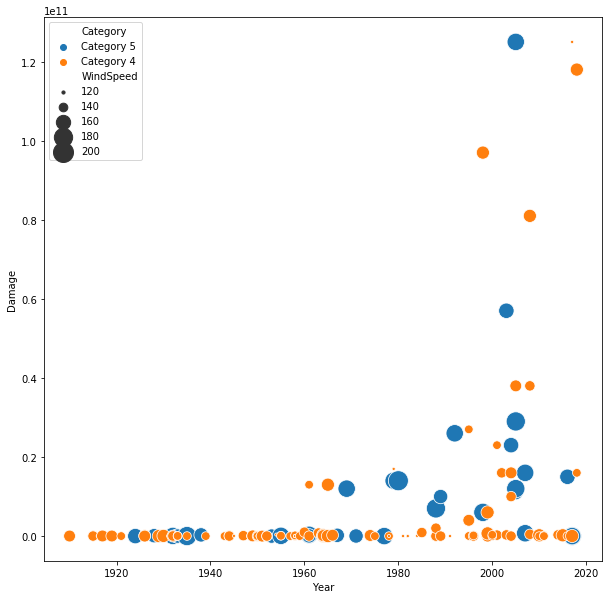

In [69]:
#Another quick plotting to check the data
ax = f, axes = plt.subplots(0,1, figsize=(10,10))
fig1 = sns.scatterplot(x="Year", y="Damage",
                     hue="Category", size="WindSpeed",
                     sizes=(10, 400),
                     data=HurricaneData)

In [70]:
# We see an interesting trend as it seem hurricanes are much more damaging after 1960. However all damages are in US dollars
# and are not adjusted for inflation.
#It would be wise as a next step to convert the damage colom into inflation adjusted damage to better compare historic hurricans
# with modern day ones

In [71]:
#### Adjusting for inflation

In [72]:
HurricaneData['YearsInflation'] = HurricaneData.Year.astype('int64') #Creating an integer version of years for anaysis
HurricaneData.head()

,Damage,Pressure,StormName,WindSpeed,Year,Category,YearsInflation
1,0,910,"""Cuba""",165,1924,Category 5,1924
2,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5,1928
3,0,921,"""Bahamas""",160,1932,Category 5,1932
4,40000000,915,"""Cuba""",175,1932,Category 5,1932
5,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5,1933


In [73]:
HurricaneData.min()

Damage                     0
Pressure                   0
StormName          "Bahamas"
WindSpeed                130
Category          Category 4
YearsInflation          1910
dtype: object

In [74]:
#Importing the inflation data from St Louis Federal Reserve. This csv is downloaded from their website. 
inflation = pd.read_csv('CPIAUCNS.csv')
inflation.DATE = pd.to_datetime(inflation.DATE)
inflation.head()

,DATE,CPIAUCNS
0,1910-01-01,9.8
1,1911-01-01,9.8
2,1912-01-01,9.8
3,1913-01-01,9.8
4,1913-01-02,9.8


In [75]:
inflation['CPI_Multiplier'] = inflation['CPIAUCNS'].iloc[-1] / inflation['CPIAUCNS']

In [76]:
# create new day column for day and month
HurricaneData['day'] = 1
HurricaneData['month'] = 1
#create new dataframe to store date info
new_df = HurricaneData[['Year', 'month', 'day']]
# create new column 'Date' in original data w/ datetime conversion
HurricaneData['Date'] = pd.to_datetime(new_df)

In [77]:
HurricaneData.head()

,Damage,Pressure,StormName,WindSpeed,Year,Category,YearsInflation,day,month,Date
1,0,910,"""Cuba""",165,1924,Category 5,1924,1,1,1924-01-01
2,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5,1928,1,1,1928-01-01
3,0,921,"""Bahamas""",160,1932,Category 5,1932,1,1,1932-01-01
4,40000000,915,"""Cuba""",175,1932,Category 5,1932,1,1,1932-01-01
5,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5,1933,1,1,1933-01-01


In [78]:

inflation.head()

,DATE,CPIAUCNS,CPI_Multiplier
0,1910-01-01,9.8,25.759082
1,1911-01-01,9.8,25.759082
2,1912-01-01,9.8,25.759082
3,1913-01-01,9.8,25.759082
4,1913-01-02,9.8,25.759082


In [79]:
#HurricaneData = pd.merge(HurricaneData, inflation, how='left', on='Date')
inflation.columns = ['Date','CPIAUCNS','CPI_Multiplier']
data = (HurricaneData.merge(inflation, on='Date', how='left', suffixes=('_','')))

In [80]:
data.head()

,Damage,Pressure,StormName,WindSpeed,Year,Category,YearsInflation,day,month,Date,CPIAUCNS,CPI_Multiplier
0,0,910,"""Cuba""",165,1924,Category 5,1924,1,1,1924-01-01,17.3,14.591850
1,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5,1928,1,1,1928-01-01,17.3,14.591850
2,0,921,"""Bahamas""",160,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077
3,40000000,915,"""Cuba""",175,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077
4,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5,1933,1,1,1933-01-01,12.9,19.568915


In [81]:
HurricaneData = data

In [82]:
HurricaneData['AdjustedDamage'] = HurricaneData['Damage'] * HurricaneData['CPI_Multiplier'] # Adjusting the costs based on our multiplyer

In [83]:
HurricaneData.head()

,Damage,Pressure,StormName,WindSpeed,Year,Category,YearsInflation,day,month,Date,CPIAUCNS,CPI_Multiplier,AdjustedDamage
0,0,910,"""Cuba""",165,1924,Category 5,1924,1,1,1924-01-01,17.3,14.591850,0.000000e+00
1,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5,1928,1,1,1928-01-01,17.3,14.591850,1.459185e+09
2,0,921,"""Bahamas""",160,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077,0.000000e+00
3,40000000,915,"""Cuba""",175,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077,7.061231e+08
4,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5,1933,1,1,1933-01-01,12.9,19.568915,5.283607e+08


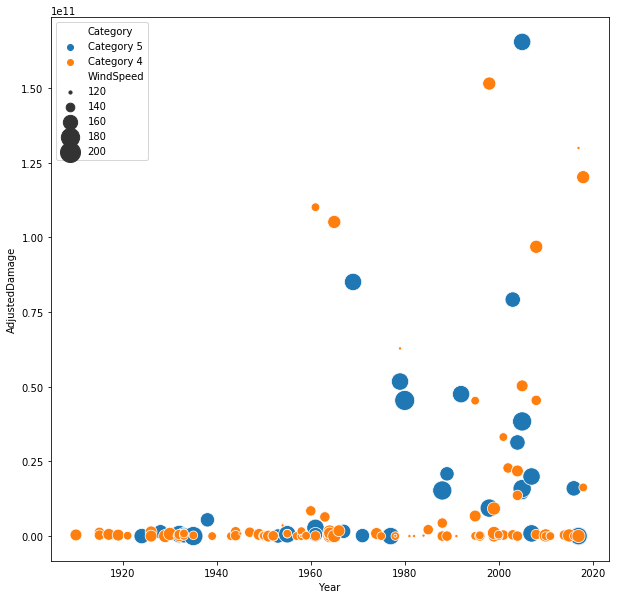

In [84]:
ax = f, axes = plt.subplots(0,1, figsize=(10,10))
fig1 = sns.scatterplot(x="Year", y="AdjustedDamage",
                     hue="Category", size="WindSpeed",
                     sizes=(10, 400),
                     data=HurricaneData)

In [90]:
#Converting adjusted damage to an integer
HurricaneData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 13 columns):
Damage            146 non-null int64
Pressure          146 non-null int64
StormName         146 non-null category
WindSpeed         146 non-null int64
Year              146 non-null category
Category          146 non-null object
YearsInflation    146 non-null int64
day               146 non-null int64
month             146 non-null int64
Date              146 non-null datetime64[ns]
CPIAUCNS          146 non-null float64
CPI_Multiplier    146 non-null float64
AdjustedDamage    146 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 23.3+ KB


In [91]:
HurricaneData.AdjustedDamage = HurricaneData.AdjustedDamage.astype('int64')

In [92]:
#Saving the data to a csv file
HurricaneData.to_csv('HurricaneDamage.csv')

In [93]:
#Checking that it works 
dataframe = pd.read_csv('HurricaneDamage.csv')
dataframe.head()

,Unnamed: 0,Damage,Pressure,StormName,WindSpeed,Year,Category,YearsInflation,day,month,Date,CPIAUCNS,CPI_Multiplier,AdjustedDamage
0,0,0,910,"""Cuba""",165,1924,Category 5,1924,1,1,1924-01-01,17.3,14.591850,0
1,1,100000000,929,"""San Felipe IIOkeechobee""",160,1928,Category 5,1928,1,1,1928-01-01,17.3,14.591850,1459184971
2,2,0,921,"""Bahamas""",160,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077,0
3,3,40000000,915,"""Cuba""",175,1932,Category 5,1932,1,1,1932-01-01,14.3,17.653077,706123076
4,4,27000000,930,"""Cuba–Brownsville""",160,1933,Category 5,1933,1,1,1933-01-01,12.9,19.568915,528360697
